In [34]:
# ====================================
#  Load dataset
# ====================================
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore", UserWarning)

#Load file
df = pd.read_csv("C:\\Users\\shara\\Downloads\\Cleaned_Merged_Diabetes.csv", low_memory=False)

III. Prescriptive Analysis



🔹 1. Glucose & Insulin Markers

# Question 1:
 How do insulin markers (basal rate, bolus volume delivered) influence glucose control across patients?

Reasoning: Insulin directly regulates blood glucose.
Basal Rate: Continuous background insulin → stabilizes blood sugar levels.
Bolus Volume Delivered: Extra insulin given at mealtimes → controls glucose spikes.
If insulin is working effectively, we expect:
Higher basal/bolus → lower mean glucose.
Poor correlation may suggest mismatch between insulin dosing and glucose response.

In [12]:
# Step 1: Defining patient-level summary
# glucose_mean → average blood glucose
#glucose_std → glucose variability
#basal_mean → average basal insulin rate
#bolus_mean → average bolus insulin volume
__
patient = df.groupby('Patient_ID').agg(
    glucose_mean=('glucose','mean'),
    glucose_std=('glucose','std'),
    basal_mean=('basal_rate','mean'),
    bolus_mean=('bolus_volume_delivered','mean')
).dropna().reset_index()

# step 2: Showing first 5 patient profiles
patient.head()


,Patient_ID,glucose_mean,glucose_std,basal_mean,bolus_mean
0,HUPA0001P,181.443726,70.644633,0.049675,0.038477
1,HUPA0002P,113.469664,59.145068,0.088362,0.073153
2,HUPA0003P,143.273519,61.326542,0.054491,0.071280
3,HUPA0004P,180.377984,83.020747,0.073126,0.149215
4,HUPA0005P,147.698624,49.791133,0.066450,0.026102


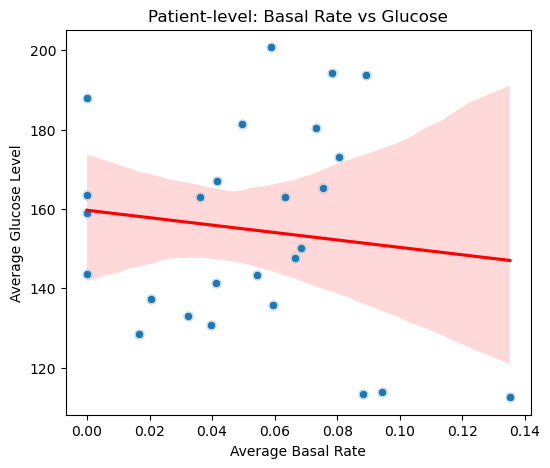

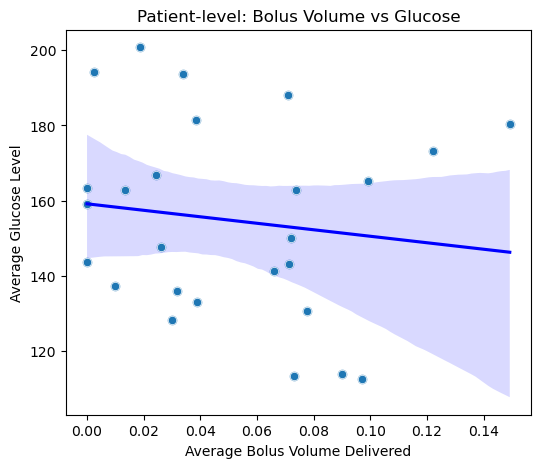

In [16]:
# Step 3: Scatter: Basal Rate vs Mean Glucose
plt.figure(figsize=(6,5))
sns.regplot(data=patient, x='basal_mean', y='glucose_mean',
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

# Styling
plt.xlabel("Average Basal Rate")
plt.ylabel("Average Glucose Level")
sns.scatterplot(data=patient, x='basal_mean', y='glucose_mean')
plt.title("Patient-level: Basal Rate vs Glucose")
plt.show()

# Scatter: Bolus Volume vs Mean Glucose
plt.figure(figsize=(6,5))
sns.regplot(data=patient, x='bolus_mean', y='glucose_mean',
            scatter_kws={'alpha':0.6}, line_kws={'color':'blue'})

plt.xlabel("Average Bolus Volume Delivered")
plt.ylabel("Average Glucose Level")
sns.scatterplot(data=patient, x='bolus_mean', y='glucose_mean')
plt.title("Patient-level: Bolus Volume vs Glucose")
plt.show()


Key Insight: 
Downward slope (negative trend) → Higher insulin use is associated with lower glucose levels (good control).
Flat slope (no trend) → Insulin may not be effectively influencing glucose → could suggest resistance or poor adherence.
Upward slope (positive trend) → More insulin is given, but glucose is still high → possible insulin resistance or mismanagement.

🔹Sleep & Glucose Control

# Question 2:

 Does poor sleep quality/duration correlate with worse glucose control?

Reasoning: Sleep deprivation increases insulin resistance → leads to higher glucose.


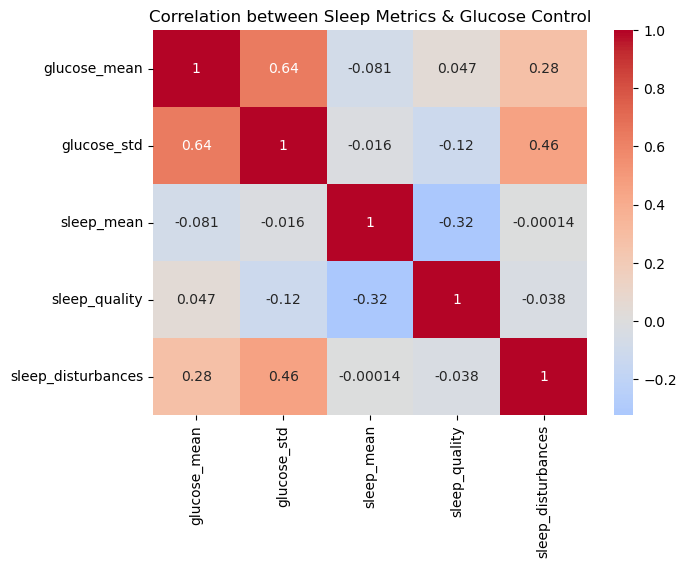

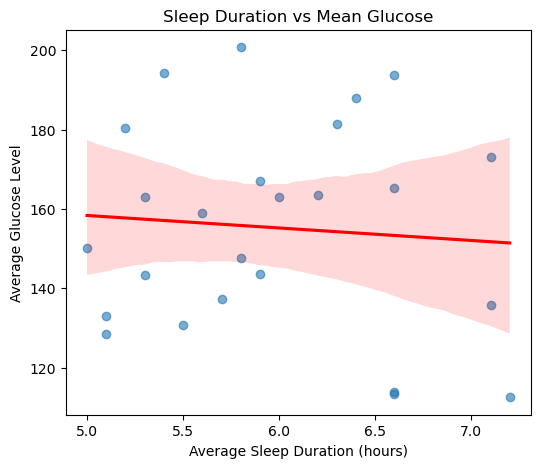

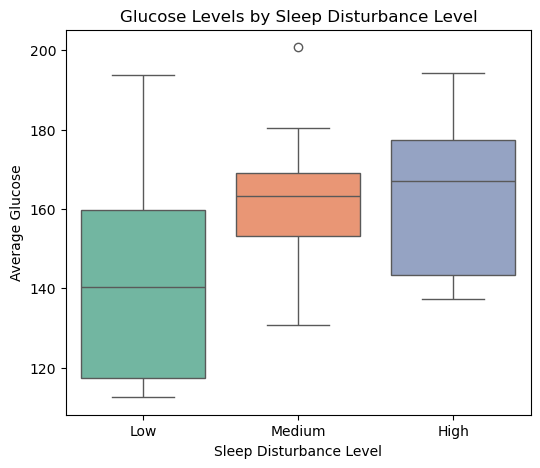

In [37]:
sleep = df.groupby('Patient_ID').agg(
    glucose_mean=('glucose','mean'),
    glucose_std=('glucose','std'),   # glucose stability
    sleep_mean=('Average Sleep Duration (hrs)','mean'),
    sleep_quality=('Sleep Quality (1-10)','mean'),
    sleep_disturbances=('% with Sleep Disturbances','mean')
).dropna().reset_index()

sleep.head

plt.figure(figsize=(7,5))
sns.heatmap(numeric_sleep.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation between Sleep Metrics & Glucose Control")
plt.show()

numeric_sleep = sleep.select_dtypes(include='number')

plt.figure(figsize=(6,5))
sns.regplot(data=sleep, x='sleep_mean', y='glucose_mean',
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title("Sleep Duration vs Mean Glucose")
plt.xlabel("Average Sleep Duration (hours)")
plt.ylabel("Average Glucose Level")
plt.show()


# Categorize disturbances into 3 levels
sleep['disturbance_level'] = pd.qcut(sleep['sleep_disturbances'], 
                                     q=3, labels=['Low','Medium','High'])

plt.figure(figsize=(6,5))
sns.boxplot(data=sleep, 
            x='disturbance_level',
            y='glucose_mean',
            hue='disturbance_level',
            palette="Set2", 
            legend=False)

plt.title("Glucose Levels by Sleep Disturbance Level")
plt.xlabel("Sleep Disturbance Level")
plt.ylabel("Average Glucose")
plt.show()



Demographics & Health Markers
# Question 3:
How do demographic markers (Age, Gender, Race) influence glucose control and sleep quality?

Why: Age, gender, and race affect diabetes risk.

Reasoning: Group-level comparisons (ANOVA/t-test).. These are appropriate for comparing means across demographic groups (e.g., comparing average glucose levels between males and females).

Chart: Bar plots of mean glucose by gender/race.

Key insights: visualize mean glucose levels by gender and race. These plots will help to quickly spot disparities or trends across groups.


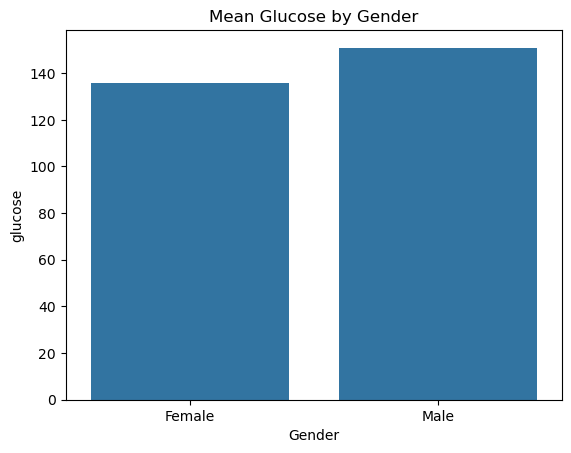

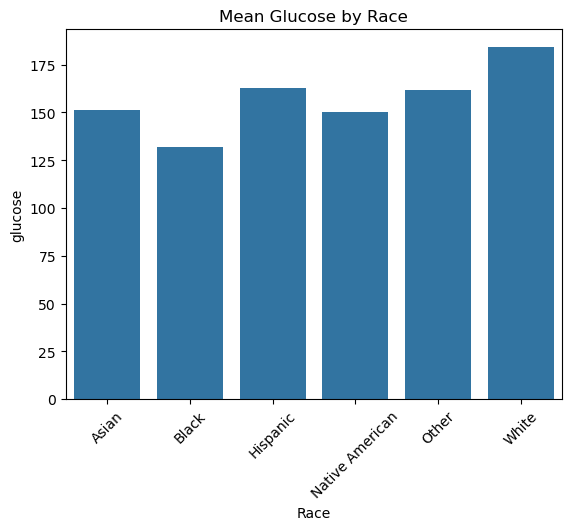

In [39]:
# Mean glucose by gender
gender_glucose = df.groupby('Gender')['glucose'].mean().reset_index()
sns.barplot(data=gender_glucose, x='Gender', y='glucose')
plt.title("Mean Glucose by Gender")
plt.show()

# Mean glucose by race
race_glucose = df.groupby('Race')['glucose'].mean().reset_index()
sns.barplot(data=race_glucose, x='Race', y='glucose')
plt.title("Mean Glucose by Race")
plt.xticks(rotation=45)
plt.show()


🔹 Prescriptive Combination

# Question 4:
Which combination of lifestyle markers (sleep + steps + carb intake) best predicts healthy glucose levels?

Reasoning: Combination markers give stronger predictive evidence.

Key insights: Correlation matrix / regression model.

Chart: Pairplot (glucose vs carbs, sleep, steps).

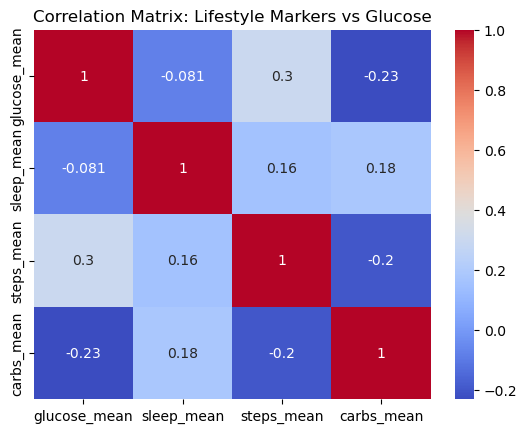

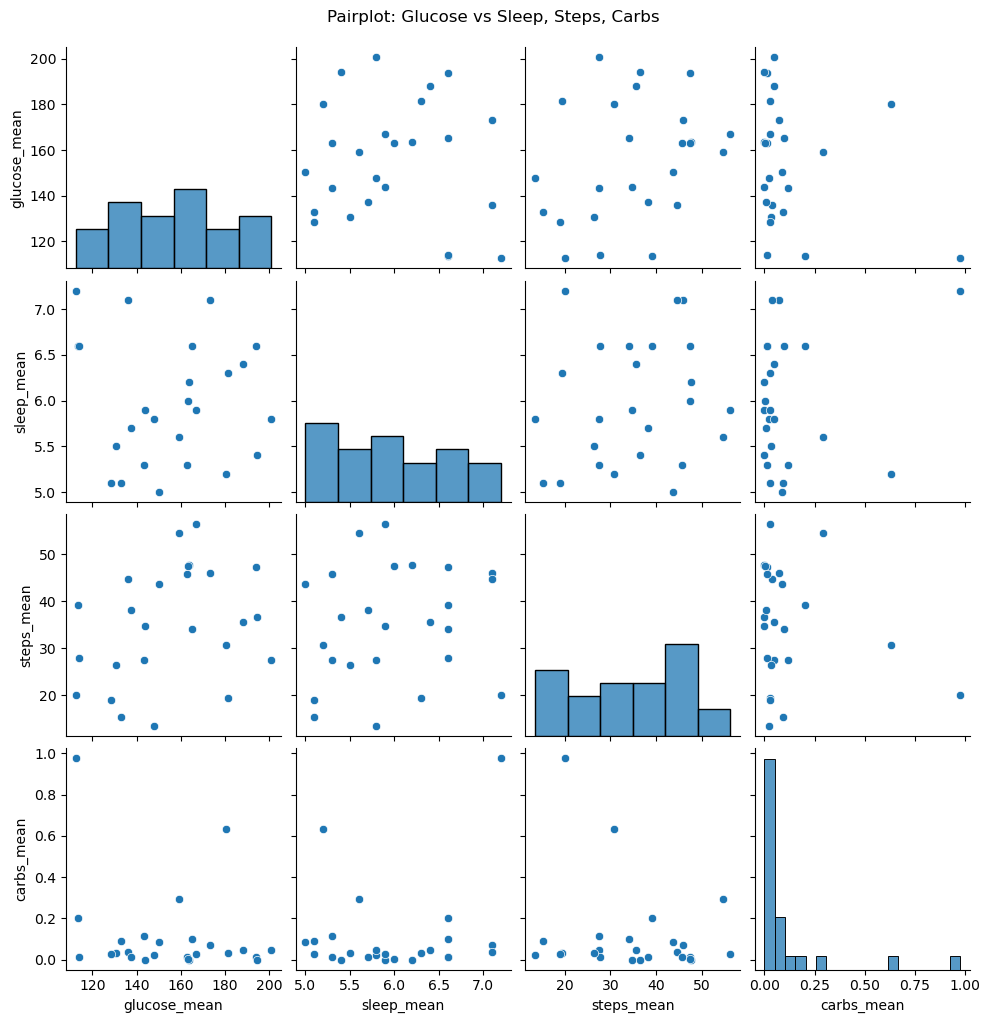

NameError: name 'lifestyle_df' is not defined

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
lifestyle = df.groupby('Patient_ID').agg(
    glucose_mean=('glucose', 'mean'),
    sleep_mean=('Average Sleep Duration (hrs)', 'mean'),
    steps_mean=('steps', 'mean'),
    carbs_mean=('carb_input', 'mean')
).dropna().reset_index()

# Correlation matrix
sns.heatmap(lifestyle[['glucose_mean', 'sleep_mean', 'steps_mean', 'carbs_mean']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix: Lifestyle Markers vs Glucose")
plt.show()

# Pairplot
sns.pairplot(lifestyle[['glucose_mean', 'sleep_mean', 'steps_mean', 'carbs_mean']])
plt.suptitle("Pairplot: Glucose vs Sleep, Steps, Carbs", y=1.02)
plt.show()

# Regression model
import statsmodels.api as sm
X = lifestyle_df[['Average Sleep Duration (hrs)', 'Steps', 'Carbohydrate Intake (g)']]
y = lifestyle_df['glucose']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())